# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
X_train = pd.read_csv('./output/Xtrain.csv')
print(X_train.shape)
print(X_train.isna().sum())
X_train = X_train.loc[:,'Subject':'angle(Z,gravityMean)'].set_index(['Subject'], append=True)
X_train

(7352, 563)
Unnamed: 0                                0
Subject                                   0
tBodyAcc-mean()-X                        17
tBodyAcc-mean()-Y                       951
tBodyAcc-mean()-Z                        55
                                       ... 
angle(tBodyGyroMean,gravityMean)        469
angle(tBodyGyroJerkMean,gravityMean)    451
angle(X,gravityMean)                    443
angle(Y,gravityMean)                    407
angle(Z,gravityMean)                    385
Length: 563, dtype: int64


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.091262,-0.484347,-0.782851,-0.999865,-0.999932,-0.999973,-0.999970,-0.999930,-0.999959,-0.999929
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.999784,-0.999782,-0.999830,-0.999899,-0.999883,-0.999783,-0.999828,-0.999908,-0.999856,-0.999988
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.999862,-0.999674,-0.999906,-0.999831,-0.999863,-0.999676,-0.999903,-0.999954,-0.999988,-0.999990
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.999950,-0.999948,-0.999877,-0.999860,-0.999948,-0.999946,-0.999931,-0.999989,-0.999992,-0.999993
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.999865,-0.999918,-0.999911,-0.999908,-0.999864,-0.999933,-0.999926,-0.999993,-0.999996,-0.999988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,NaN,0.039905,NaN,0.077078,-0.282301,NaN,...,NaN,0.609508,NaN,0.360604,-1.000000,-0.935484,-0.793103,-0.434780,-0.633189,-0.568724
7348,30,0.273853,-0.007749,-0.147468,-0.235309,NaN,0.004816,NaN,0.059280,-0.322552,-0.029456,...,-0.933333,-0.935484,-0.931034,-0.516570,-0.638588,-0.585016,-0.213016,-0.587630,NaN,0.410296
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,NaN,0.274533,-0.304515,-0.098913,NaN,...,-0.541557,-0.468655,NaN,0.355355,NaN,0.600799,NaN,0.408862,-0.933333,-0.935484


In [3]:
Perc_Isna=(pd.DataFrame((X_train.isna().sum()/7352*100).tolist()))
Perc_Isna.rename(columns={0:'Porcentagem'}, inplace=True)
Coluna = pd.DataFrame(X_train.columns)
Coluna.rename(columns={0:'Colunas'}, inplace=True)
Porc_Isna=pd.concat([Coluna, Perc_Isna], axis=1)
Porc_Isna

,Colunas,Porcentagem
0,tBodyAcc-mean()-X,0.231230
1,tBodyAcc-mean()-Y,12.935256
2,tBodyAcc-mean()-Z,0.748096
3,tBodyAcc-std()-X,9.494015
4,tBodyAcc-std()-Y,13.329706
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",6.379217
557,"angle(tBodyGyroJerkMean,gravityMean)",6.134385
558,"angle(X,gravityMean)",6.025571
559,"angle(Y,gravityMean)",5.535909


In [4]:
porcentagem5= (Porc_Isna.loc[Porc_Isna['Porcentagem']<=5.0])
porcentagem5


,Colunas,Porcentagem
0,tBodyAcc-mean()-X,0.231230
2,tBodyAcc-mean()-Z,0.748096
7,tBodyAcc-mad()-Y,4.352557
23,tBodyAcc-entropy()-Y,4.270947
24,tBodyAcc-entropy()-Z,3.264418
...,...,...
526,fBodyBodyAccJerkMag-skewness(),2.625136
527,fBodyBodyAccJerkMag-kurtosis(),2.761153
528,fBodyBodyGyroMag-mean(),2.951578
529,fBodyBodyGyroMag-std(),3.890098


In [5]:
print(porcentagem5['Colunas'].tolist())

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Z', 'tBodyAcc-mad()-Y', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'fBodyAccJerk-bandsEnergy()-49,56.1', 'fBodyAccJerk-bandsEnergy()-1,16.1', 'fBodyAccJerk-bandsEnergy()-17,32.1', 'fBodyAccJerk-bandsEnergy()-33,48.1', 'fBodyAccJerk-bandsEnergy()-49,64.1', 'fBodyAccJerk-bandsEnergy()-1,24.1', 'fBodyAccJerk-bandsEnergy()-25,48.1', 'fBodyAccJerk-bandsEnergy()-1,8.2', 'fBodyAccJerk-bandsEnergy()-9,16.2', 'fBodyAccJerk-bandsEnergy()-17,24.2', 'fBodyAccJerk-bandsEnergy()-25,32.2', 'fBodyAccJerk-bandsEnergy()-33,40.2', 'fBodyAccJerk-bandsEnergy()-41,48.2', 'fBodyAccJerk-bandsEnergy()-49,56.2', 'fBodyAccJerk-bandsEnergy()-57,64.2', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyAccJerk-bandsEnergy()-17,32.2', 'fBodyAccJerk-bandsEnergy()-33,48.2', 'fBodyAccJerk-bandsEnergy()-49,64.2', 'fBodyAccJerk-bandsEnergy()-1,24.2', 'fBodyAccJerk-bandsEnergy()-25,48.2', 'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'fBodyGyro-std()-X', 'fBodyGyro-

In [6]:
print(X_train.isna().sum())
X_train= X_train.fillna(method='ffill')
X_train= X_train.fillna(method='bfill')
X_train.isna().sum()

tBodyAcc-mean()-X                        17
tBodyAcc-mean()-Y                       951
tBodyAcc-mean()-Z                        55
tBodyAcc-std()-X                        698
tBodyAcc-std()-Y                        980
                                       ... 
angle(tBodyGyroMean,gravityMean)        469
angle(tBodyGyroJerkMean,gravityMean)    451
angle(X,gravityMean)                    443
angle(Y,gravityMean)                    407
angle(Z,gravityMean)                    385
Length: 561, dtype: int64


tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [7]:
X_test = pd.read_csv('./output/Xtest.csv')
print(X_test.shape)
print(X_test.isna().sum())
X_test = X_test.loc[:,'Subject':'angle(Z,gravityMean)'].set_index(['Subject'], append=True)
X_test

(2947, 563)
Unnamed: 0                                0
Subject                                   0
tBodyAcc-mean()-X                         3
tBodyAcc-mean()-Y                       385
tBodyAcc-mean()-Z                        17
                                       ... 
angle(tBodyGyroMean,gravityMean)        190
angle(tBodyGyroJerkMean,gravityMean)    185
angle(X,gravityMean)                    171
angle(Y,gravityMean)                    161
angle(Z,gravityMean)                    175
Length: 563, dtype: int64


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.395423,-0.698762,-0.387457,-0.786394,-0.485654,-0.786815,-0.994629,-0.990469,-0.992778,-0.995680
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.997180,-0.997515,-0.996846,-0.998916,-0.999560,-0.999471,-0.999293,-0.999210,-0.999241,-0.999714
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.999958,-0.999584,-0.999925,-0.999688,-0.999836,-0.999955,-0.999981,-0.999984,-0.999878,-0.999841
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.999850,-0.999921,-0.999957,-0.999997,-0.999419,-0.999831,-0.999865,-0.999975,-0.999420,-0.999908
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.999897,-0.999936,-0.999630,-0.999942,-0.999619,-0.999858,-0.999988,-0.999981,-0.999969,-0.999885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,NaN,...,-0.498637,-0.819107,NaN,0.207481,-0.069901,-0.910508,-0.947521,-0.933101,-0.934271,-0.952961
2943,24,0.363385,-0.039214,-0.105915,-0.305388,NaN,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.246639,-0.124352,-0.858301,-0.940725,-0.961456,-0.901237,-0.950143,-0.967324,-0.945644,-0.972146
2944,24,0.349966,NaN,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,NaN,0.412667,NaN,0.197919,-0.844484,-0.892850,-0.928502,-0.869329,-0.889220,-0.883661


In [8]:
Perc_Isnatest=(pd.DataFrame((X_test.isna().sum()/7352*100).tolist()))
Perc_Isnatest.rename(columns={0:'Porcentagem'}, inplace=True)
Coluna = pd.DataFrame(X_test.columns)
Coluna.rename(columns={0:'Colunas'}, inplace=True)
Porc_Isnatest=pd.concat([Coluna, Perc_Isnatest], axis=1)
Porc_Isnatest

,Colunas,Porcentagem
0,tBodyAcc-mean()-X,0.040805
1,tBodyAcc-mean()-Y,5.236670
2,tBodyAcc-mean()-Z,0.231230
3,tBodyAcc-std()-X,2.557127
4,tBodyAcc-std()-Y,4.583787
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",2.584331
557,"angle(tBodyGyroJerkMean,gravityMean)",2.516322
558,"angle(X,gravityMean)",2.325898
559,"angle(Y,gravityMean)",2.189880


In [9]:
porcentagem5test= (Porc_Isnatest.loc[Porc_Isnatest['Porcentagem']<=5.0])
porcentagem5test

,Colunas,Porcentagem
0,tBodyAcc-mean()-X,0.040805
2,tBodyAcc-mean()-Z,0.231230
3,tBodyAcc-std()-X,2.557127
4,tBodyAcc-std()-Y,4.583787
5,tBodyAcc-std()-Z,2.856366
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",2.584331
557,"angle(tBodyGyroJerkMean,gravityMean)",2.516322
558,"angle(X,gravityMean)",2.325898
559,"angle(Y,gravityMean)",2.189880


In [10]:
print(porcentagem5test['Colunas'].tolist())

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-correlation()-X,Z', 'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-arCoeff()-Z,1', 'tBodyAccJerk-arCoeff()-Z,2', 'tBodyAccJerk-arCoeff()-Z,3', 'tBodyAccJerk-arCoeff()-Z,4', 'tBodyAccJerk-correlation()-X,Y', 'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y', 'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyroJerk-max()-X', 'tBodyGyroJerk-max()-Y', 'tBodyGyroJerk-max()-Z', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-a

In [11]:
print(X_test.isna().sum())
X_test = X_test.fillna(method='ffill')
X_test = X_test.fillna(method='bfill')
X_test.isna().sum()

tBodyAcc-mean()-X                         3
tBodyAcc-mean()-Y                       385
tBodyAcc-mean()-Z                        17
tBodyAcc-std()-X                        188
tBodyAcc-std()-Y                        337
                                       ... 
angle(tBodyGyroMean,gravityMean)        190
angle(tBodyGyroJerkMean,gravityMean)    185
angle(X,gravityMean)                    171
angle(Y,gravityMean)                    161
angle(Z,gravityMean)                    175
Length: 561, dtype: int64


tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [12]:
import csv

with open ('./Input/UCI HAR Dataset/train/y_train.txt', 'r', encoding='utf-8') as y:
    y_train=pd.DataFrame(csv.reader(y, delimiter=' '))
y_train = y_train.astype(int)

y_train.to_csv('./output/y_train.csv') # Salvando y_train em csv.


In [13]:
with open ('./Input/UCI HAR Dataset/test/y_test.txt', 'r', encoding='utf-8') as y:
    y_test=pd.DataFrame(csv.reader(y, delimiter=' '))
y_test = y_test.astype(int)

y_test.to_csv('./output/y_test.csv') # Salvando y_test em csv.


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=100)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(5514, 561)
(5514, 1)
(1838, 561)
(1838, 1)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [16]:
clf = DecisionTreeClassifier(random_state=100, max_depth=4).fit(X_train, y_train)


<AxesSubplot:>

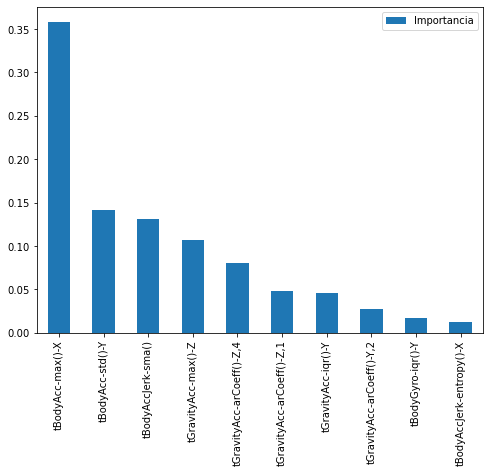

In [17]:
importancia = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=["Importancia"])   
importancia.sort_values(by='Importancia', ascending=False, inplace=True)
importancia.head(10).plot(kind='bar', figsize=(8,6))

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [18]:
importancia.head(3)

,Importancia
tBodyAcc-max()-X,0.357899
tBodyAcc-std()-Y,0.141921
tBodyAccJerk-sma(),0.130775


In [19]:
X_train_import = X_train[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()']]
X_valid_import = X_valid[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()']]
print(X_train_import.shape)
print(X_valid_import.shape)

(5514, 3)
(1838, 3)


In [20]:
clf = DecisionTreeClassifier(random_state=2360873)
path = clf.cost_complexity_pruning_path(X_train_import, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [21]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_import, y_train)
    clfs.append(clf)

CPU times: user 19 s, sys: 35.5 ms, total: 19.1 s
Wall time: 19.1 s


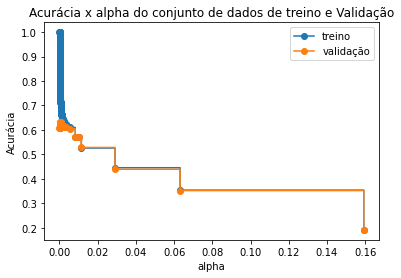

CPU times: user 2.73 s, sys: 7.92 ms, total: 2.74 s
Wall time: 2.74 s


In [25]:
%%time

train_scores = [clf.score(X_train_import, y_train) for clf in clfs]
valid_scores  = [clf.score(X_valid_import, y_valid)   for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e Validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [26]:
%%time

ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

CPU times: user 101 µs, sys: 0 ns, total: 101 µs
Wall time: 108 µs


DecisionTreeClassifier(ccp_alpha=0.00041924000912364214, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [27]:
X_test_import = X_test[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()']]

/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


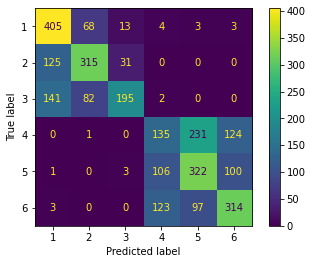

In [28]:
plot_confusion_matrix(melhor_arvore, X_test_import, y_test);

In [29]:
Predict = melhor_arvore.predict(X_test_import)

In [30]:
accuracy_score(y_test, Predict)

0.5721072276891754